In [1]:
import pandas as pd

# Tratamento da base de dados da Anfavea (licenciamento de automóveis).

# Parte 1: Importando a base de dados

In [2]:
base_anfavea=pd.read_excel("./SeriesTemporais_Autoveiculos.xltx",sheet_name="Séries_Temporais_Autoveículos")

In [3]:
'''
url="https://anfavea.com.br/docs/SeriesTemporais_Autoveiculos.xlsm"
base_anfavea=pd.read_excel(url,sheet_name="Séries_Temporais_Autoveículos")
'''

'\nurl="https://anfavea.com.br/docs/SeriesTemporais_Autoveiculos.xlsm"\nbase_anfavea=pd.read_excel(url,sheet_name="Séries_Temporais_Autoveículos")\n'

In [4]:
coluna_inicial=base_anfavea.columns
#base_anfavea.head() #base original cheia de erros

# Parte 2: Manipulando a base de dados

In [5]:
base_anfavea.iloc[3].shape

(26,)

In [6]:
#salvando os títulos corretos das colunas 
title=base_anfavea.iloc[3]
#title=list(list)
#apagando as linhas sujas
base_anfavea.drop([0,1,2,3], axis=0, inplace=True)
#convertendo os valores da série hístórica para inteiros (em um teste anterior foi detectado que todos eram object)
for i in range(1,26):
    base_anfavea[coluna_inicial[i]]=base_anfavea[coluna_inicial[i]].astype(int)

# trocando o títullo inicial para o nome "Data" por comodidade (antes era NaN)
title[0]="Data"

#Vamos trocar o index do DataFrame para que ele comece do 1 e não do 4 (já que apagamos 3 linhas)
number = [item for item in range(base_anfavea.shape[0])]
base_anfavea.index=number

#visualizando a base mais limpa
#base_anfavea.head()

#Sobre o número de licenciamentos totais de  veículos
#Nota 1: Os dados 
#de licenciamento até 2001 (inclusive) referem-se às vendas no atacado.

C:\Users\User\AppData\Local\Temp\ipykernel_23720\3547200948.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title[0]="Data"


# Parte 3: Dividindo a base pelo critério das subdivisões da Anfavea

Criaremos 5 dataframes distintos. Para cada um deles teremos os dados divididos por categorias. Sendo quatro deles referente as subdivisões de automóveis da Anfavea: Automóveis, Comerciais leves, Caminhões, Ônibus.
A última será o agregado total, que chamaremos comumente de Total.

In [7]:
#Seguiremos a ordem do arquivo original extraído da Anfavea. Tal ordenamento será indiferente para  nós.
def extracao(x):
        data=base_anfavea.iloc[:,0] #vou salvar logo a data que servirá para todo mundo
        total=base_anfavea.iloc[:,x]
        nacional=base_anfavea.iloc[:,x+1]
        importado=base_anfavea.iloc[:,x+2]
        producao=base_anfavea.iloc[:,x+3]
        exportacao=base_anfavea.iloc[:,x+4]
        base_extraida=pd.DataFrame({
        title[0]:data,
        title[1]:total,
        title[2]:nacional,
        title[3]:importado,
        title[4]:producao,
        title[5]:exportacao})
        return base_extraida

autoveiculo_total=extracao(1)
automoveis=extracao(6)
comercial_leve=extracao(11)
caminhoes=extracao(16)
onibus=extracao(21)

Precisamos apagar as linhas em branco que aparecem no final de nosso DataFrame.
Por alguma razão, no arquivo original da Anfavea as datas existentes na planilha já contemplam os meses restantes do ano. 

Por isso, para nossa utilização dos dados, precisamos retirar essas linhas que ainda não trazem informações relevantes para nossa pesquisa.

In [8]:
colunas=autoveiculo_total.columns
lista=[]
# Primeiro pegaremos uma lista com resultados True para linhas em que os 5 atributos são iguais a 0.
for i in range(1,6):
    filtro = list(autoveiculo_total[colunas[i]] ==0)    
    tam=len(filtro)
    for x in range(tam):
        if filtro[x]==True:
            lista.append(x)
    filtro.clear()

#como o resultado é enorme, faremos aqui um filtro para capturar apenas as linhas que aparecem pelo menos 
# 5 vezes, ou seja, com 5 vezes o 0 para cada um dos atributos de nosso DataFrame.
linhas_apagar=[]
for a in lista:
    vezes=lista.count(a)#conta quantas vezes o elemento aparece na lista
    if vezes==5:
        linhas_apagar.append(a)

#Agora que temos uma lista que contem apenas linhas com pelo menos 5 vezes o 0, iremos filtrar os valores repetidos 
# para chegarmos no valor final, o qual queremos.
resultantList = []

for element in linhas_apagar:
    if element not in resultantList:
        resultantList.append(element)

#finalmente chegamos a nossa lista contendo os índices das linhas com apenas 0.
#agora podemos limpar cada um de nossos DataFrames.
#Sendo tal processo inteiramente automatizado
#print(resultantList)    

In [9]:
#agora vamos usar o .drop() em cada um dos DataFrames

#apagando as linhas inúteis (com apenas zeros).
autoveiculo_total.drop(resultantList, axis=0, inplace=True)
automoveis.drop(resultantList, axis=0, inplace=True)
comercial_leve.drop(resultantList, axis=0, inplace=True)
caminhoes.drop(resultantList, axis=0, inplace=True)
onibus.drop(resultantList, axis=0, inplace=True)

Agora que separamos nossas informações em 5 dataframes distintos nosso próximo passo será criar novos atributos a partir dos dados originais. Nosso intuito é buscar mais informações a respeito da dinâmina da indústria nacional de veículos no Brasil para o período indicado na série histórica da Anfavea.

# Parte 4: Explorando informações com os dados 

In [10]:
# antes de comerçarmos, vamos explorar melhor as datas de nosso Dataframe
#marcador=autoveiculo_total.iloc[0,0]
#marcador.year
#pd.Timestamp.now().year
#https://www.acervolima.com.br/2020/12/obtenha-hora-de-um-timestamp-no-pandas.html#:~:text=Exemplo%202%3A%20pandas.,retorna%20DateTimeIndex%20desse%20fuso%20hor%C3%A1rio.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Para termos uma visão global de como está composta a estrutura da indústria de automóveis no Brasil,
vamos examinar como ela se divide entre diferentes categorias.

Primeiramente, queremos saber como evoluiu a produção de veículos no Brasil:

In [12]:
#vou criar um DataFrame contendo apenas produção de automóveis nas 4 categorias
producao_4=pd.DataFrame()
producao_4['Data']=automoveis['Data'].copy()
producao_4['Automoveis']=automoveis['Produção'].copy()
producao_4['Comercial Leve']=comercial_leve['Produção'].copy()
producao_4['Ônibus']=onibus['Produção'].copy()
producao_4['Caminhões']=caminhoes['Produção'].copy()

#Vamos estudar a produção anual para extrair melhor a riqueza dos detalhes
lista_ano=[producao_4['Data'][i].year for i in range(producao_4.shape[0])]
#producao_4.head()
producao_4['Ano']=lista_ano

In [113]:
def para_ano(base): #recebe um dataframe
    anos=base['Ano'].unique() #valores únicos da coluna ano
    prod_anual=[]
    for i in anos:
        x=i
        try:
            a=base.query(f'Ano=={x}').sum()
            a=dict(a)
            a['Ano']=x
            prod_anual.append(a)
        except:
            continue
    base=pd.DataFrame(prod_anual)
    return base

In [114]:
producao_4_ano=para_ano(producao_4)

C:\Users\User\AppData\Local\Temp\ipykernel_23720\420522038.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\User\AppData\Local\Temp\ipykernel_23720\420522038.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\User\AppData\Local\Temp\ipykernel_23720\420522038.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\User\AppData\Local\Temp\ipykernel_23720\420522038.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=Non

C:\Users\User\AppData\Local\Temp\ipykernel_23720\420522038.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\User\AppData\Local\Temp\ipykernel_23720\420522038.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\User\AppData\Local\Temp\ipykernel_23720\420522038.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\User\AppData\Local\Temp\ipykernel_23720\420522038.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=Non

C:\Users\User\AppData\Local\Temp\ipykernel_23720\420522038.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [118]:
#série histórica de produção de veículos (gráfico barra)
fig = px.bar(producao_4_ano.query('Ano<2022'), x='Ano', y=['Automoveis',
            'Comercial Leve','Ônibus','Caminhões'],
            title='Série histórica da produção anual de veículos no Brasil (1957-2021)',
            height=500)
fig.show()

In [133]:
#média móvel
media_movel_prod=pd.DataFrame()
media_movel_prod['Ano']=producao_4_ano['Ano']
media_movel_prod['Automoveis']=producao_4_ano.iloc[:,0].rolling(11).mean()
media_movel_prod['Comercial Leve']=producao_4_ano.iloc[:,1].rolling(11).mean()
media_movel_prod['Ônibus']=producao_4_ano.iloc[:,2].rolling(11).mean()
media_movel_prod['Caminhões']=producao_4_ano.iloc[:,3].rolling(11).mean()
#media_movel_prod.head(20)

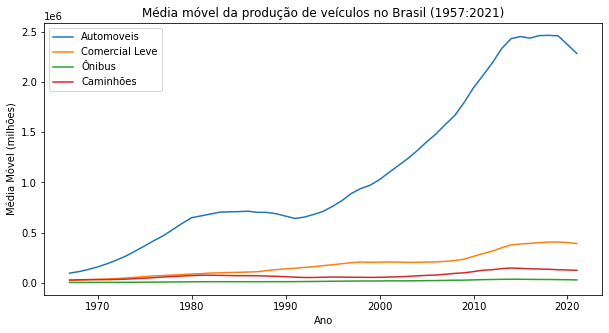

In [142]:
media_movel_prod.query('Ano<2022').plot(x='Ano',title='Média móvel da produção de veículos \
no Brasil (1957:2021)',ylabel='Média Móvel (milhões)',figsize=[10,5])
plt.show()

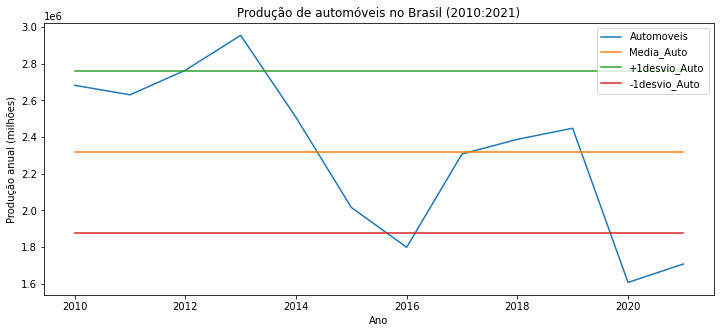

In [160]:
ten_years=producao_4_ano.query('Ano>2009 and Ano<2022').copy()
media_auto=ten_years.iloc[:,0].mean()
desvio_auto=ten_years.iloc[:,0].std()
ten_years['Media_Auto']=media_auto
ten_years['+1desvio_Auto']=media_auto+(1*desvio_auto)
ten_years['-1desvio_Auto']=media_auto-(1*desvio_auto)
ten_years.plot(x='Ano',y=['Automoveis','Media_Auto','+1desvio_Auto','-1desvio_Auto'],\
              title='Produção de automóveis no Brasil (2010:2021)',\
               ylabel='Produção anual (milhões)',figsize=[12,5])
plt.show()

Observando a série histórica da Anfavea sobre a produção de veículos no Brasil, desde 1957 até o final de 2021, é possível notar a forte exposição da categoria de automóveis.

Essa categoria compõe majoritariamente veículos de 4 a 5 lugares, geralmente utilizados como meio de transporte nas grandes cidades, sendo majoritariamente utilizados como bem de consumo (não categorizado como bem de capital).

Um aspecto importante que é notável no gráfico é a característica cíclica da produção.

De 1957 até 1980 a indústria automobilística passou por uma forte fase de crescimento. Nesse período a produção média anual de automóveis (CAGR) alcançou XX% e o volume produzido saiu de XX mil unidades em 1957 para XX mil em 1980.

saindo de uma pordução residual, pouco expressiva até o final da década de 70 (quando o país mal produzia 23 mil unidades de automóveis)

In [30]:
def base_100(base): #recebe um dataframe
    base_percent=pd.DataFrame()
    auto=[]
    comer=[]
    onib=[]
    cami=[]
    for i in range(base.shape[0]):
        soma=base.iloc[i,1:5].sum() #produção total na linha
        a=base.iloc[i,1]#automoveis
        b=base.iloc[i,2]#comercial_leve
        c=base.iloc[i,3]#onibus
        d=base.iloc[i,4]#caminhão
        auto.append((a/soma))
        comer.append((b/soma))
        onib.append((c/soma))
        cami.append((d/soma))
    ano=base.iloc[:,5]
    base_percent['Ano']=ano
    base_percent['Automoveis']=auto
    base_percent['Comercial Leve']=comer
    base_percent['Ônibus']=onib
    base_percent['Caminhões']=cami
    return base_percent


In [31]:
producao_perc=base_100(producao_4)

In [16]:
fig = px.bar(producao_perc.query('Ano<2022'), x='Ano', y=['Automoveis','Comercial Leve','Ônibus','Caminhões'],
            title='Série histórica da produção de veículos no Brasil em base 100 (1957-2021)',
            height=500)
fig.show()

In [163]:
'''
plt.figure(figsize=(9,7))
plt.bar(producao_4['Ano'],producao_4.iloc[:,1],color="blue",label="Automóveis")
plt.bar(producao_4['Ano'],producao_4.iloc[:,2],color="yellow",bottom=np.array(producao_4.iloc[:,1]),label="Comercial Leve")
plt.bar(producao_4['Ano'],producao_4.iloc[:,3],bottom=np.array(producao_4.iloc[:,1])+np.array(producao_4.iloc[:,2]),color="red",label="Ônibus")
plt.bar(producao_4['Ano'],producao_4.iloc[:,4],color="green",np.array(producao_4.iloc[:,1])+np.array(producao_4.iloc[:,2])+np.array(producao_4.iloc[:,3]),label="Caminhões")

plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()
'''

'\nplt.figure(figsize=(9,7))\nplt.bar(producao_4[\'Ano\'],producao_4.iloc[:,1],color="blue",label="Automóveis")\nplt.bar(producao_4[\'Ano\'],producao_4.iloc[:,2],color="yellow",bottom=np.array(producao_4.iloc[:,1]),label="Comercial Leve")\nplt.bar(producao_4[\'Ano\'],producao_4.iloc[:,3],bottom=np.array(producao_4.iloc[:,1])+np.array(producao_4.iloc[:,2]),color="red",label="Ônibus")\nplt.bar(producao_4[\'Ano\'],producao_4.iloc[:,4],color="green",np.array(producao_4.iloc[:,1])+np.array(producao_4.iloc[:,2])+np.array(producao_4.iloc[:,3]),label="Caminhões")\n\nplt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))\nplt.show()\n'

Criaremos  uma nova coluna com o estoque gerado ao final de cada mês

In [164]:
def estoques(dataframe):
    #nível de estoque ao final do mês
    a=dataframe['Produção']
    b=dataframe['Licenciamento Nacionais']
    c=dataframe['Exportação']
    dataframe["Estoque"]=a-b-c
    #nível de estoque acumulado existente no início do mês
    lista=[]
    for i in range(dataframe['Estoque'].shape[0]):
        if i==0:
            lista.append(dataframe['Estoque'][i])
            anterior=dataframe['Estoque'][i]
        else:
            z=anterior+dataframe['Estoque'][i]
            lista.append(z)
            anterior=z
    dataframe['Estoque AC']=lista
    #retornando uma cópia de um dataframe com as duas novas colunas de estoques
    return dataframe.copy()

In [165]:
autoveiculo_total=estoques(autoveiculo_total)
automoveis=estoques(automoveis)
comercial_leve=estoques(comercial_leve)
caminhoes=estoques(caminhoes)
onibus=estoques(onibus)

<AxesSubplot:>

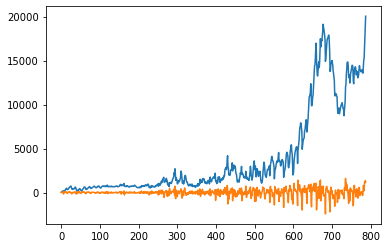

In [166]:
onibus['Estoque AC'].plot()
onibus['Estoque'].plot()

Qual a relação entre estoques acumulados e licenciamentos totais? 

1021.1510152284264


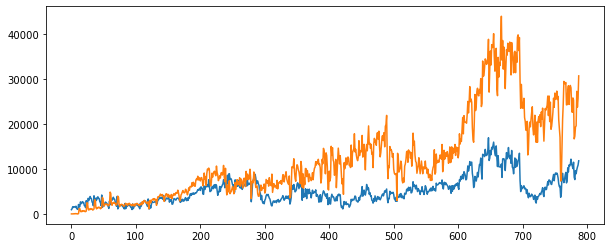

In [167]:
caminhoes[title[2]].plot(figsize=(10,4))
comercial_leve[title[2]].plot(figsize=(10,4))
print(onibus[title[2]].mean())